## Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://engineering.case.edu/sites/default/files/198.mat

--2022-04-03 13:23:18--  https://engineering.case.edu/sites/default/files/198.mat
Resolving engineering.case.edu (engineering.case.edu)... 129.22.104.251
Connecting to engineering.case.edu (engineering.case.edu)|129.22.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2931672 (2.8M)
Saving to: ‘198.mat’

198.mat             100%[===================>]   2.79M  4.02MB/s    in 0.7s    

2022-04-03 13:23:19 (4.02 MB/s) - ‘198.mat’ saved [2931672/2931672]



In [ ]:
!wget https://engineering.case.edu/sites/default/files/160.mat

--2022-04-03 13:23:19--  https://engineering.case.edu/sites/default/files/160.mat
Resolving engineering.case.edu (engineering.case.edu)... 129.22.104.251
Connecting to engineering.case.edu (engineering.case.edu)|129.22.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2931672 (2.8M)
Saving to: ‘160.mat’

160.mat             100%[===================>]   2.79M  4.01MB/s    in 0.7s    

2022-04-03 13:23:21 (4.01 MB/s) - ‘160.mat’ saved [2931672/2931672]



### Importing Libraries

In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import PIL.Image
import pathlib
import tensorflow as tf

### Importing Autoencoder Model

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/SDP Dataset 12k/Saved models/autoencoder(64,32,280).h5')

## Making Multiple Directories

In [ ]:
import os

#dlist =["Oversampled(30,7)"]
dirlist=['0hp_352','1hp_352','2hp_352','3hp_352']
# ,"D","E","F","G"]
namelist=["NF","IF","BF","OF"]
for j in dirlist:
  a = '/content/drive/MyDrive/SDP Dataset 48k/Motor/' 
  a = os.path.join(a,j)
  os.mkdir(a)
  for i in namelist:
    path = os.path.join(a, i)
    os.mkdir(path)
  

## *Checking* NCC 

In [ ]:

def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    #return (data-mean_data)/(std_data*np.sqrt(data.size-1))
    return (data-mean_data)/(std_data)
def ncc(data0, data1):
    
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))
# ncc(img1,img2)
def compare(NF0,IF0):
  corr=[]
  for (i,j) in zip(NF0,IF0):
        i = cv2.imread(str(i))
        i=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        j = cv2.imread(str(j))
        j=cv2.cvtColor(j, cv2.COLOR_BGR2GRAY)
        corr.append(ncc(i,j))
  return corr

dirlist = os.listdir('/content/drive/MyDrive/SDP Dataset 12k/12KHZ')
dirlist = dirlist[3:]
# dirlist=['1_307','A_309','A_307','A_357','A_407','A_409','A_128','A_568','A_157']
print(dirlist)
Acorrdic = {}
for i in dirlist:
  dir = '/content/drive/MyDrive/SDP Dataset 12k/12KHZ/' + i
  datanew = pathlib.Path(dir)
  NFnew = list(datanew.glob('BF/*'))
  IFnew = list(datanew.glob('OF/*'))
  
  Acorrdic[i] = sum(compare(NFnew,IFnew))
  print(Acorrdic)
print(min(Acorrdic, key=Acorrdic.get))

['2_407', '2_307', '2_352']
{'2_407': 203.0765361821679}
{'2_407': 203.0765361821679, '2_307': 199.49247466176965}
{'2_407': 203.0765361821679, '2_307': 199.49247466176965, '2_352': 198.98818895884477}
2_352


In [ ]:
'''import os

dlist =["Dot size (image size - 2inch)"]
alist=['1_352','2_352','3_352','4_352','1_307','2_307','3_307','4_307']
# ,"D","E","F","G"]
namelist=["NF","IF","BF","OF"]
for j in alist:
  a = '/content/drive/MyDrive/SDP Dataset/Split Dataset/dot size check/' #+j
  a = os.path.join(a,j)
  os.mkdir(a)
  #for i in namelist:
    #path = os.path.join(a, i)
    #os.mkdir(path)

Selected Parameters having 100 accuracy on IF v OF. LIST :

In [ ]:
for c in alist:
  print(int(c[2:4]),int(c[-1]))

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=07eacfa0c0858d2d57ad10d65a3a4ed84855ba9b0898ba13944a01118674d897
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Download DATASET @ 48k and saving image data set


In [ ]:
!pip install wget
from bs4 import BeautifulSoup

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=1f64350136c294b46a89296d92581d918e8a62f6c6a37a88dbcb9d80d4920c5f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
from bs4 import BeautifulSoup as bs
import requests
url="https://engineering.case.edu/bearingdatacenter/48k-drive-end-bearing-fault-data"
hp0dic ={'IF':[],'BF':[],'OF':[],'NF':[97]}
hp1dic ={'IF':[],'BF':[],'OF':[],'NF':[98]}
hp2dic ={'IF':[],'BF':[],'OF':[],'NF':[99]}
hp3dic ={'IF':[],'BF':[],'OF':[],'NF':[100]}
key ={'I':'IF','B':'BF','O':'OF'}
Alist = []
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
for link in soup.findAll('a'):
    if str(link['href']).endswith('.mat') :
      if link.string.endswith('0'):
        hp0dic[key[link.string[0]]].append(link['href'][-7:-4])
      elif link.string.endswith('1'):
        hp1dic[key[link.string[0]]].append(link['href'][-7:-4])
      elif link.string.endswith('2'):
        hp2dic[key[link.string[0]]].append(link['href'][-7:-4])
      elif link.string.endswith('3'):
        hp3dic[key[link.string[0]]].append(link['href'][-7:-4])
      print (str(link['href']),link.string)
# Alist = [97,105,169,209,3001,118,185,222,3005,130,144,156,197,234,246,258,98,106,170,210,3002,119,186,223,3006,131,145,158,235,247,259,99,107,171,211,3003,120,187,224,3007,132,146,159,199,236,248,260,100,108,172,212,3004,121,188,225,3008,133,147,200,237,249,261]

# for i in Alist:
#   print(i)
#   a = 'https://engineering.case.edu/sites/default/files/' + str(i) + ".mat"
#   wget.download(a)


https://engineering.case.edu/sites/default/files/109.mat IR007_0
https://engineering.case.edu/sites/default/files/122.mat B007_0
https://engineering.case.edu/sites/default/files/135.mat OR007@6_0
https://engineering.case.edu/sites/default/files/148.mat OR007@3_0
https://engineering.case.edu/sites/default/files/161.mat OR007@12_0
https://engineering.case.edu/sites/default/files/110.mat IR007_1
https://engineering.case.edu/sites/default/files/123.mat B007_1
https://engineering.case.edu/sites/default/files/136.mat OR007@6_1
https://engineering.case.edu/sites/default/files/149.mat OR007@3_1
https://engineering.case.edu/sites/default/files/162.mat OR007@12_1
https://engineering.case.edu/sites/default/files/111.mat IR007_2
https://engineering.case.edu/sites/default/files/124.mat B007_2
https://engineering.case.edu/sites/default/files/137.mat OR007@6_2
https://engineering.case.edu/sites/default/files/150.mat OR007@3_2
https://engineering.case.edu/sites/default/files/163.mat OR007@12_2
https:/

In [ ]:
# print(hp0dic,hp1dic,hp2dic,hp3dic)
import numpy as np
hp0_list = list(np.concatenate(list(hp0dic.values())).flat)
hp1_list = list(np.concatenate(list(hp1dic.values())).flat)
hp2_list = list(np.concatenate(list(hp2dic.values())).flat)
hp3_list = list(np.concatenate(list(hp3dic.values())).flat)
hpdir = {'0':(hp0_list,hp0dic),'1':(hp1_list,hp1dic),'2':(hp2_list,hp2dic),'3':(hp3_list,hp3dic)}


In [ ]:
Alist = hp0_list + hp1_list + hp2_list + hp3_list
Alist.sort()
print(Alist)

['100', '109', '110', '111', '112', '122', '123', '124', '125', '135', '136', '137', '138', '148', '149', '150', '151', '161', '162', '163', '164', '174', '175', '176', '177', '189', '190', '191', '192', '201', '202', '203', '204', '213', '214', '215', '217', '226', '227', '228', '229', '238', '239', '240', '241', '250', '251', '252', '253', '262', '263', '264', '265', '97', '98', '99']


In [ ]:
 for i in Alist:
  print(i)
  a = 'https://engineering.case.edu/sites/default/files/' + str(i) + ".mat"
  wget.download(a)

100
109
110
111
112
122
123
124
125
135
136
137
138
148
149
150
151
161
162
163
164
174
175
176
177
189
190
191
192
201
202
203
204
213
214
215
217
226
227
228
229
238
239
240
241
250
251
252
253
262
263
264
265
97
98
99


In [ ]:
#  wget.download('https://engineering.case.edu/sites/default/files/264.mat')

'264.mat'

In [ ]:
# wget.download(url, out=output_directory)

Calculation for oversample

In [ ]:
import scipy.io
over0 = {'IF': 300 , 'BF': 300,'OF': 700 , 'NF' : 100}
over = {'IF':800, 'BF':800,'OF':1500 , 'NF' : 300}

# over = {0:(300,300,700,200) ,1 :(1000,1000,1400,400) }
bdict = { 99 : 6 , 175 : 4  }
for hp,dic in hpdir.items():
  print(hp)
  for key,value in dic[1].items():
  # Alist:
    imglen = 0
    # print(key)
    for i in value:
      if int(i) in bdict.keys():
        b = bdict[int(i)]
      else :
        b = 3
      if hp == '0':
        mat = scipy.io.loadmat(str(i))
        u  =list( mat.keys())
        imglen = imglen + len(mat[u[b]]) /( over[key])
      else : 
        mat = scipy.io.loadmat(str(i))
        u  =list( mat.keys())
        imglen = imglen + len(mat[u[b]]) /( over[key])
    # print(len(mat[u[b]]),i,b,u)
    print(imglen,key)
def loadmat(m):
  mat = scipy.io.loadmat(str(m))
  return mat

0
690.08125 IF
922.2787500000001 BF
832.5353333333335 OF
813.1266666666667 NF
1
1825.5149999999999 IF
1825.5149999999999 BF
2269.4306666666666 OF
1613.01 NF
2
1831.3162499999999 IF
1826.9650000000001 BF
2269.8173333333334 OF
1616.8766666666668 NF
3
1827.69 IF
1827.6912499999999 BF
2271.365333333333 OF
1618.81 NF


In [ ]:
hpdirnnew = hpdir

In [ ]:
del hpdirnnew['0']
del hpdirnnew['1']
hpdirnnew

{'2': (['111',
   '176',
   '215',
   '124',
   '191',
   '228',
   '137',
   '150',
   '163',
   '203',
   '240',
   '252',
   '264',
   '99'],
  {'BF': ['124', '191', '228'],
   'IF': ['111', '176', '215'],
   'NF': [99],
   'OF': ['137', '150', '163', '203', '240', '252', '264']}),
 '3': (['112',
   '177',
   '217',
   '125',
   '192',
   '229',
   '138',
   '151',
   '164',
   '204',
   '241',
   '253',
   '265',
   '100'],
  {'BF': ['125', '192', '229'],
   'IF': ['112', '177', '217'],
   'NF': [100],
   'OF': ['138', '151', '164', '204', '241', '253', '265']})}

### 48k 35,2 motor 0,1,2,3

In [ ]:
# databalance = {"NF": 1000 ,"IF":1000,"BF": 1000,"OF":1200}
over0 = {'IF': 300 , 'BF': 300,'OF': 700 , 'NF' : 100}
over = {'IF':800, 'BF':800,'OF':1500 , 'NF' : 300}
databalance = [over0,over]
over =500
samplength = 1600
dirlist=['0 hp_352','1 hp_352','2 hp_352','3 hp_352'] #[,,'5_307','7_307','A_309','A_307','A_357','A_407','A_409','A_128','A_568','A_157']

# hp0 = {"NF":[97],"IF":[105,169,209,3001],"BF":[118,185,222,3005],"OF":[130,144,156,197,234,246,258]}
# hp1 = {"NF":[98],"IF":[106,170,210,3002],"BF":[119,186,223,3006],"OF":[131,145,158,198,235,247,259]}
# hp2 = {"NF":[99],"IF":[107,171,211,3003],"BF":[120,187,224,3007],"OF":[132,146,159,199,236,248,260]}
# hp3 = {"NF":[100],"IF":[108,172,212,3004],"BF":[121,188,225,3008],"OF":[133,147,160,200,237,249,261]}
#dictB = {'1':0.08,'2':0.1,'3':0.12,'4':0.14}
#dictB = {'1':0.5}
def loadmat(m,k):
  mat = scipy.io.loadmat(str(m))
  u = list(mat.keys())
  return np.array(mat[u[k]])
s = 2 
bdict = { 99 : 6 , 175 : 4  }
val = 0.5
para =(35,2)
def sdp(b):
  z = para[0]
  t = para[1]
  bmax = np.max(b)
  bmin = np.min(b)
  bmean = np.mean(b)
  plt.figure(figsize=(s,s))
  for i in range(0,7):
      r = ((b - bmin)/(bmax - bmin))
      r = r[:len(b)-t]
      theta = (60*i + (((b[t:]-bmin)/(bmax-bmin))*z))
      phi = (60*i - (((b[t:]-bmin)/(bmax-bmin))*z))
      
      plt.polar(theta*(np.pi/180),r ,'.', c='blue',markersize=val)
      plt.polar(phi*(np.pi/180),r ,'.', c='red',markersize=val)
      plt.grid(False)
      plt.axis('off')
  fig = plt.gcf()
  return fig

for hp,dic in hpdirnnew.items():
  print(hp)
  if int(hp) == 0 :
    overdic = databalance[0]
  else :
    overdic = databalance[1]
  for key,value in dic[1].items():
  # Alist:
    print(key)
    over = overdic[key]
    for i in value:
      if int(i) in bdict.keys():
        k = bdict[int(i)]
      else :
        k = 3
      t = loadmat(i,k)
      for j in range( int(len(t)/over)):
          y = t[j*over :j*over + samplength]
          if len(y) == 1600 :
            g = y
            h = g - np.mean(y)
            x = np.max(abs(y - np.mean(y)))
            g = h/x
            fig = sdp(g)
            
            print("TYPE:",key,"DIR:",hp,"MAT no.",i,"J value",j)

            fig.savefig("/content/drive/MyDrive/SDP Dataset 48k/Motor/" + hp + "hp_352/" + key + "/"+"48k_" + key + "_" + hp + "hp_" + "z=" + str(para[0])+", "+"t=" + str(para[1]) + " " + str(i) +"_" + str(j) + ".jpg", bbox_inches='tight' )
            plt.clf()
            plt.close(fig)

Streaming output truncated to the last 5000 lines.
TYPE: BF DIR: 3 MAT no. 192 J value 98
TYPE: BF DIR: 3 MAT no. 192 J value 99
TYPE: BF DIR: 3 MAT no. 192 J value 100
TYPE: BF DIR: 3 MAT no. 192 J value 101
TYPE: BF DIR: 3 MAT no. 192 J value 102
TYPE: BF DIR: 3 MAT no. 192 J value 103
TYPE: BF DIR: 3 MAT no. 192 J value 104
TYPE: BF DIR: 3 MAT no. 192 J value 105
TYPE: BF DIR: 3 MAT no. 192 J value 106
TYPE: BF DIR: 3 MAT no. 192 J value 107
TYPE: BF DIR: 3 MAT no. 192 J value 108
TYPE: BF DIR: 3 MAT no. 192 J value 109
TYPE: BF DIR: 3 MAT no. 192 J value 110
TYPE: BF DIR: 3 MAT no. 192 J value 111
TYPE: BF DIR: 3 MAT no. 192 J value 112
TYPE: BF DIR: 3 MAT no. 192 J value 113
TYPE: BF DIR: 3 MAT no. 192 J value 114
TYPE: BF DIR: 3 MAT no. 192 J value 115
TYPE: BF DIR: 3 MAT no. 192 J value 116
TYPE: BF DIR: 3 MAT no. 192 J value 117
TYPE: BF DIR: 3 MAT no. 192 J value 118
TYPE: BF DIR: 3 MAT no. 192 J value 119
TYPE: BF DIR: 3 MAT no. 192 J value 120
TYPE: BF DIR: 3 MAT no. 192 J v

# Download DATASET @ 12k


In [ ]:
import wget
#add 198 and 160
Alist = [97,105,169,209,3001,118,185,222,3005,130,144,156,197,234,246,258,98,106,170,210,3002,119,186,223,3006,131,145,158,235,247,259,99,107,171,211,3003,120,187,224,3007,132,146,159,199,236,248,260,100,108,172,212,3004,121,188,225,3008,133,147,200,237,249,261]
#Alist = [200,237,249,261]
for i in Alist:
  print(i)
  a = 'https://engineering.case.edu/sites/default/files/' + str(i) + ".mat"
  wget.download(a)


97
105
169
209
3001
118
185
222
3005
130
144
156
197
234
246
258
98
106
170
210
3002
119
186
223
3006
131
145
158
235
247
259
99
107
171
211
3003
120
187
224
3007
132
146
159
199
236
248
260
100
108
172
212
3004
121
188
225
3008
133
147
200
237
249
261


## Function of returning key.. for assigning data loaded to respective folders of classes.

In [ ]:
def get_key(val,dic):
    for key, value in dic.items():
        for x in value:
         if np.array_equal(x,val):
             return key
 
    return "nan"
dictA = {"NF":[98],"IF":[110],"BF":[123],"OF":[136,149,162]}
Alist = [98,110,123,136,149,162]

for x in Alist:
  print(get_key(x,dictA))

NF
IF
BF
OF
OF
OF



Generating Dataset A w Subfolders  : 

*   A -> 
*   A_"para",..,.., ->
*   NF,IF,... **




 


In [ ]:
'''Alist = [136,149,162] #,98,110,123]
dirlist=['1_307','2_307','3_307','4_307','1_352','2_352','3_352','4_352'] #'A_309','A_307','A_357','A_407','A_409','A_128','A_568','A_157']
dictA = {"NF":[98],"IF":[110],"BF":[123],"OF":[136,149,162]}
samplength = 1600
# para =(35,2)
for n in dirlist:
  para=(int(n[2:4]),int(n[-1]))
  for x in Alist:
      matstr = str(x) + ".mat"
      # update scipy
      mat = scipy.io.loadmat(matstr)
      def sdp(c1):
        z = para[0]
        t = para[1]
        c1max = np.max(c1)
        c1min = np.min(c1)
        c1mean = np.mean(c1)
        c1 = (c1 - c1mean )/ np.max(abs(c1- c1mean)) #"MENTIONED IN PAPER BUT NOT TAKEN AS IT IS NOT REQUIRED"
        for i in range(0,7):
            r = ((c1 - c1min)/(c1max - c1min))
            r = r[:len(c1)-t]
            theta = (60*i + (((c1-c1min)/(c1max-c1min))*z))
            phi = (60*i - (((c1-c1min)/(c1max-c1min))*z))
            theta = theta[t:]
            phi = phi[t:]
            plt.polar(theta*(np.pi/180),r ,'.', c='blue')
            plt.polar(phi*(np.pi/180),r ,'.', c='red')
            plt.grid(False)
            plt.axis('off')
      b="X"
      if len(str(x))<3:
        b="X0"

      c1 =np.array( mat[b + str(x) + "_DE_time"])
      c1max = np.max(c1)
      c1min = np.min(c1)
      c1mean = np.mean(c1)
      for j in range( int(len(c1)/samplength)):
          y = c1[j*samplength:j*samplength + samplength]
          sdp(y)
          d = get_key(x,dictA)
          # print(d)
          fig = plt.figure()
          fig.set_size_inches(3,3, forward=True)
          plt.savefig("/content/drive/MyDrive/SDP Dataset/A/" + n + "/" + d + "/"+"0.18MM_" + d + "_" + "z=" + str(para[0])+", "+"t=" + str(para[1]) + " " + str(x) +"_" + str(j) + ".jpg" )
          plt.clf()


In [ ]:
'''#dumb extra smart

over =1000
Alist = [98,110,123,136,149,162]
dirlist=['1_307']#,'3_307','5_307','7_307'] #'A_309','A_307','A_357','A_407','A_409','A_128','A_568','A_157']
dictA = {"NF":[98],"IF":[110],"BF":[123],"OF":[136,149,162]}
#dictB = {'1':0.08,'2':0.1,'3':0.12,'4':0.14}
dictB = {'1':0.5}
samplength = 1600
# para =(35,2)
for n in dirlist:
  para=(int(n[2:4]),int(n[-1]))
  num = n[0]
  val= dictB[num]
  for x in Alist:
      matstr = str(x) + ".mat"
      # update scipy
      mat = scipy.io.loadmat(matstr)
      def sdp(b):
        z = para[0]
        t = para[1]
        bmax = np.max(b)
        bmin = np.min(b)
        bmean = np.mean(b)
        plt.figure(figsize=(2, 2))
        for i in range(0,7):
            r = ((b - bmin)/(bmax - bmin))
            r = r[:len(b)-t]
            theta = (60*i + (((b-bmin)/(bmax-bmin))*z))
            phi = (60*i - (((b-bmin)/(bmax-bmin))*z))
            theta = theta[t:]
            phi = phi[t:]
            plt.polar(theta*(np.pi/180),r ,'.', c='blue',markersize=val)
            plt.polar(phi*(np.pi/180),r ,'.', c='red',markersize=val)
            plt.grid(False)
            plt.axis('off')
        fig = plt.gcf()
        return fig

      b="X"
      if len(str(x))<3:
        b="X0"

      t =np.array( mat[b + str(x) + "_DE_time"])
      # tmax = np.max(t)
      # tmin = np.min(t)
      # tmean = np.mean(t)
      
      for j in range( int(len(t)/samplength)):
          y = t[j*samplength :j*samplength + samplength]
          g = y
          h = g - np.mean(y)
          i = np.max(abs(y - np.mean(y)))
          g = h/i
          fig = sdp(g)
          d = get_key(x,dictA)
          # print(d)

          fig.savefig("/content/drive/MyDrive/SDP Dataset/Dot size (image size - 2inch)/" + n + "/" + d + "/"+"0.18MM_" + d + "_" + "z=" + str(para[0])+", "+"t=" + str(para[1]) + " " + str(x) +"_" + str(j) + ".jpg", bbox_inches='tight' )
          plt.clf()


## List and dictionary of data of all Hps

In [ ]:
import numpy as np
hp0 = {"IF":[105,169,209,3001],"BF":[118,185,222,3005],"OF":[130,144,156,197,234,246,258]} #{"NF":[97],
hp1 = {"IF":[106,170,210,3002],"BF":[119,186,223,3006],"OF":[131,145,158,198,235,247,259]} #{"NF":[98],
hp2 = {"IF":[107,171,211,3003],"BF":[120,187,224,3007],"OF":[132,146,159,199,236,248,260]} #{"NF":[99],
hp3 = {"IF":[108,172,212,3004],"BF":[121,188,225,3008],"OF":[133,147,160,200,237,249,261]} #{"NF":[100]
hp0_list = list(np.concatenate(list(hp0.values())).flat)
hp1_list = list(np.concatenate(list(hp1.values())).flat)
hp2_list = list(np.concatenate(list(hp2.values())).flat)
hp3_list = list(np.concatenate(list(hp3.values())).flat)
hpdir = {'0':(hp0_list,hp0),'1':(hp1_list,hp1),'2':(hp2_list,hp2),'3':(hp3_list,hp3)}


## Oversampling 1000 of all except NF

In [ ]:
#oversample 12K O,1,2,3 HP
databalance = {"NF": 1000 ,"IF":1000,"BF": 1000,"OF":1200}
over =500
samplength = 1600
dirlist=['0 hp_352','1 hp_352','2 hp_352','3 hp_352'] #[,,'5_307','7_307','A_309','A_307','A_357','A_407','A_409','A_128','A_568','A_157']

# hp0 = {"NF":[97],"IF":[105,169,209,3001],"BF":[118,185,222,3005],"OF":[130,144,156,197,234,246,258]}
# hp1 = {"NF":[98],"IF":[106,170,210,3002],"BF":[119,186,223,3006],"OF":[131,145,158,198,235,247,259]}
# hp2 = {"NF":[99],"IF":[107,171,211,3003],"BF":[120,187,224,3007],"OF":[132,146,159,199,236,248,260]}
# hp3 = {"NF":[100],"IF":[108,172,212,3004],"BF":[121,188,225,3008],"OF":[133,147,160,200,237,249,261]}
#dictB = {'1':0.08,'2':0.1,'3':0.12,'4':0.14}
#dictB = {'1':0.5}

val = 0.5
para =(35,2)
for n in dirlist:
  para=(int(n[-3:-1]),int(n[-1]))
  num = n[0] 
  Alist = hpdir[num][0]
  dictA = hpdir[num][1]
  s = 2  
  for x in Alist:
      matstr = str(x) + ".mat"
      mat = scipy.io.loadmat(matstr)
      d = get_key(x,dictA)
      over = databalance[d]      
      def sdp(b):
        z = para[0]
        t = para[1]
        bmax = np.max(b)
        bmin = np.min(b)
        bmean = np.mean(b)
        plt.figure(figsize=(s,s))
        for i in range(0,7):
            r = ((b - bmin)/(bmax - bmin))
            r = r[:len(b)-t]
            theta = (60*i + (((b-bmin)/(bmax-bmin))*z))
            phi = (60*i - (((b-bmin)/(bmax-bmin))*z))
            theta = theta[t:]
            phi = phi[t:]
            plt.polar(theta*(np.pi/180),r ,'.', c='blue',markersize=val)
            plt.polar(phi*(np.pi/180),r ,'.', c='red',markersize=val)
            plt.grid(False)
            plt.axis('off')
        fig = plt.gcf()
        return fig

      if x==99:
        b = 6
      else :
        b = 3
      u = list(mat.keys())     
      t =np.array( mat[u[b]])
      # tmax = np.max(t)
      # tmin = np.min(t)
      # tmean = np.mean(t)
      
      for j in range( int(len(t)/over)):
          y = t[j*over :j*over + samplength]
          if len(y) == 1600 :
            g = y
            h = g - np.mean(y)
            i = np.max(abs(y - np.mean(y)))
            g = h/i
            g = np.reshape(g,(1,1600,1))
            g = model.predict(g)
            g = np.reshape(g,(1600,1))
            fig = sdp(g)
            
            print("TYPE:",d,"DIR:",n,"MAT no.",x,"J value")

            fig.savefig("/content/drive/MyDrive/SDP Dataset 12k/Autoencoder/" + n + "/" + d + "/"+"0.18MM_" + d + "_" + "z=" + str(para[0])+", "+"t=" + str(para[1]) + " " + str(x) +"_" + str(j) + ".jpg", bbox_inches='tight' )
            plt.clf()
            plt.close(fig)





         


Streaming output truncated to the last 5000 lines.
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYPE: IF DIR: 1 hp_352 MAT no. 106 J value
TYP

## NF with sampling of 400 and 800 for total 600 images

In [ ]:
#oversample NF 12K with autoencoder
databalance = {"NF0":400 ,"NF1":800,"NF2":800,"NF3":800}
over =500
samplength = 1600
dirlist=['0 hp_352','1 hp_352','2 hp_352','3 hp_352'] 

hp0 = {"NF0":[97]} #,"IF":[105,169,209,3001],"BF":[118,185,222,3005],"OF":[130,144,156,197,234,246,258]}
hp1 = {"NF1":[98]} #,"IF":[106,170,210,3002],"BF":[119,186,223,3006],"OF":[131,145,158,198,235,247,259]}
hp2 = {"NF2":[99]} #,"IF":[107,171,211,3003],"BF":[120,187,224,3007],"OF":[132,146,159,199,236,248,260]}
hp3 = {"NF3":[100]}#,"IF":[108,172,212,3004],"BF":[121,188,225,3008],"OF":[133,147,160,200,237,249,261]}
# hp0 = {"NF":[97],"IF":[105,169,209,3001],"BF":[118,185,222,3005],"OF":[130,144,156,197,234,246,258]}
# hp1 = {"NF":[98],"IF":[106,170,210,3002],"BF":[119,186,223,3006],"OF":[131,145,158,198,235,247,259]}
# hp2 = {"NF":[99],"IF":[107,171,211,3003],"BF":[120,187,224,3007],"OF":[132,146,159,199,236,248,260]}
# hp3 = {"NF":[100],"IF":[108,172,212,3004],"BF":[121,188,225,3008],"OF":[133,147,160,200,237,249,261]}
hp0_list = list(np.concatenate(list(hp0.values())).flat)
hp1_list = list(np.concatenate(list(hp1.values())).flat)
hp2_list = list(np.concatenate(list(hp2.values())).flat)
hp3_list = list(np.concatenate(list(hp3.values())).flat)
hpdir = {'0':(hp0_list,hp0),'1':(hp1_list,hp1),'2':(hp2_list,hp2),'3':(hp3_list,hp3)}
#dictB = {'1':0.08,'2':0.1,'3':0.12,'4':0.14}
#dictB = {'1':0.5}
val = 0.5
para =(35,2)
for n in dirlist:
  para=(int(n[-3:-1]),int(n[-1]))
  num = n[0] 
  Alist = hpdir[num][0]
  dictA = hpdir[num][1]
  s = 2  
  for x in Alist:
      matstr = str(x) + ".mat"
      mat = scipy.io.loadmat(matstr)
      d = get_key(x,dictA)
      over = databalance[d]      
      def sdp(b):
        z = para[0]
        t = para[1]
        bmax = np.max(b)
        bmin = np.min(b)
        bmean = np.mean(b)
        plt.figure(figsize=(s,s))
        for i in range(0,7):
            r = ((b - bmin)/(bmax - bmin))
            r = r[:len(b)-t]
            theta = (60*i + (((b-bmin)/(bmax-bmin))*z))
            phi = (60*i - (((b-bmin)/(bmax-bmin))*z))
            theta = theta[t:]
            phi = phi[t:]
            plt.polar(theta*(np.pi/180),r ,'.', c='blue',markersize=val)
            plt.polar(phi*(np.pi/180),r ,'.', c='red',markersize=val)
            plt.grid(False)
            plt.axis('off')
        fig = plt.gcf()
        return fig

      if x==99:
        b = 6
      else :
        b = 3
      u = list(mat.keys())     
      t =np.array( mat[u[b]])
      # tmax = np.max(t)
      # tmin = np.min(t)
      # tmean = np.mean(t)
      
      for j in range( int(len(t)/over)):
          y = t[j*over :j*over + samplength]
          if len(y) == 1600 :
            g = y
            h = g - np.mean(y)
            i = np.max(abs(y - np.mean(y)))
            g = h/i
            g = np.reshape(g,(1,1600,1))
            g = model.predict(g)
            g = np.reshape(g,(1600,1))
            fig = sdp(g)
            
            print("TYPE:",d,"DIR:",n,"MAT no.",x,"J value",j)

            fig.savefig("/content/drive/MyDrive/SDP Dataset 12k/Autoencoder/" + n + "/" + d + "/"+"0.18MM_" + d + "_" + "z=" + str(para[0])+", "+"t=" + str(para[1]) + " " + str(x) +"_" + str(j) + ".jpg", bbox_inches='tight' )
            plt.clf()
            plt.close(fig)




         


TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 0
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 1
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 2
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 3
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 4
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 5
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 6
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 7
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 8
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 9
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 10
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 11
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 12
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 13
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 14
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 15
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 16
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 17
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 18
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 19
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 20
TYPE: NF0 DIR: 0 hp_352 MAT no. 97 J value 2

## DEBUGGING

In [ ]:
# len(os.listdir('/content/drive/MyDrive/SDP Dataset 12k/Motor/3 hp_352/NF'))
mat = scipy.io.loadmat('97.mat')
u = list(mat.keys())     
t =np.array(mat[u[3]])
len(t)/400

609.845

In [ ]:
NFe  = os.listdir("/content/drive/MyDrive/SDP Dataset 12k/Motor 2/0 hp_352/OF")
len(NFe)

1217

In [ ]:
print(x,dictA,n,Alist)
num

In [ ]:
Alist =[97,105,169,209,3001,118,185,222,3005,130,144,156,197,234,246,258,98,106,170,210,3002,119,186,223,3006,131,145,158,198,235,247,259,99,107,171,211,3003,120,187,224,3007,132,146,159,199,236,248,260,100,108,172,212,3004,121,188,225,3008,133,147,160,200,237,249,261]

for i in Alist:
  mat = scipy.io.loadmat(str(i))
  u  =list( mat.keys())
  print(u[3],i)
  # print(mat[u[]])

In [ ]:
mat = scipy.io.loadmat('98.mat')
C1 = np.array(mat["X098_DE_time"])
len(C1)/800

604.87875

#Split Folders

In [ ]:
'''!pip install split_folders
import splitfolders
[35,2],[40,2],[30,9],[50,2],[30,7],
#ztlist = [[35,9],[35,7],[60,2],[40,7],[40,9],[60,1],[30,2]] 
ztlist =[(39, 3), (41, 6), (39, 5), (17, 2), (17, 3), (29, 4), (46, 6), (14, 4), (43, 5), (31, 4), (10, 7), (12, 3), (42, 2), (56, 8), (49, 2), (59, 3), (49, 4),(51, 4), (49, 10), (47, 8), (15, 7), (13, 4), (34, 2), (29, 3), (40, 4), (12, 8)]



for item in ztlist:

  input_folder = "/content/gdrive/MyDrive/MP(Inner-Outer)/48kpart2/" + "z=" + str(item[0])+", "+"t=" + str(item[1])
 
  output ="/content/gdrive/MyDrive/MP(I-0)split/48kpart2/" + "z=" + str(item[0])+", "+"t=" + str(item[1])
  
  splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

In [ ]:
!pip install split_folders
import splitfolders

al = os.listdir('/content/drive/MyDrive/SDP Dataset 12k/Autoencoder')
for i in al :
  input_folder = "/content/drive/MyDrive/SDP Dataset 12k/Autoencoder/" + str(i)
  
  output ="/content/drive/MyDrive/SDP Dataset 12k/Autoencoder Split/" + str(i) 
    
  splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  6.36 files/s]
Copying files: 6 files [00:00, 14.05 files/s]
Copying files: 16 files [00:00, 36.42 files/s]
Copying files: 23 files [00:00, 45.15 files/s]
Copying files: 33 files [00:00, 59.41 files/s]
Copying files: 41 files [00:00, 65.10 files/s]
Copying files: 51 files [00:00, 74.80 files/s]
Copying files: 60 files [00:01, 76.17 files/s]
Copying files: 70 files [00:01, 82.84 files/s]
Copying files: 79 files [00:01, 81.38 files/s]
Copying files: 89 files [00:01, 81.74 files/s]
Copying files: 101 files [00:01, 91.43 files/s]
Copying files: 111 files [00:01, 92.81 files/s]
Copying files: 122 files [00:01, 95.63 files/s]
Copying files: 132 files [00:01, 93.63 files/s]
Copying files: 142 files [00:01, 89.57 files/s]
Copying files: 153 files [00:02, 93.02 files/s]
Copying files: 163 files [00:02, 85.85 files/s]
Copying files: 172 files [00:02, 85.12 files/s]
Copying files: 181 files [00:02, 84.16 files/s]
Copying fi

In [ ]:
train_dir = '/content/drive/MyDrive/SDP Dataset 12k/Autoencoder Split/0 hp_352/train'
val_dir   = '/content/drive/MyDrive/SDP Dataset 12k/Autoencoder Split/0 hp_352/val'
test_dir  = '/content/drive/MyDrive/SDP Dataset 12k/Autoencoder Split/0 hp_352/test'


In [ ]:
import os
train_NF_fnames = os.listdir(train_dir+'/NF' )
train_BF_fnames = os.listdir(train_dir+'/BF')
train_OF_fnames = os.listdir(train_dir+'/OF')
train_IF_fnames = os.listdir(train_dir+'/IF')

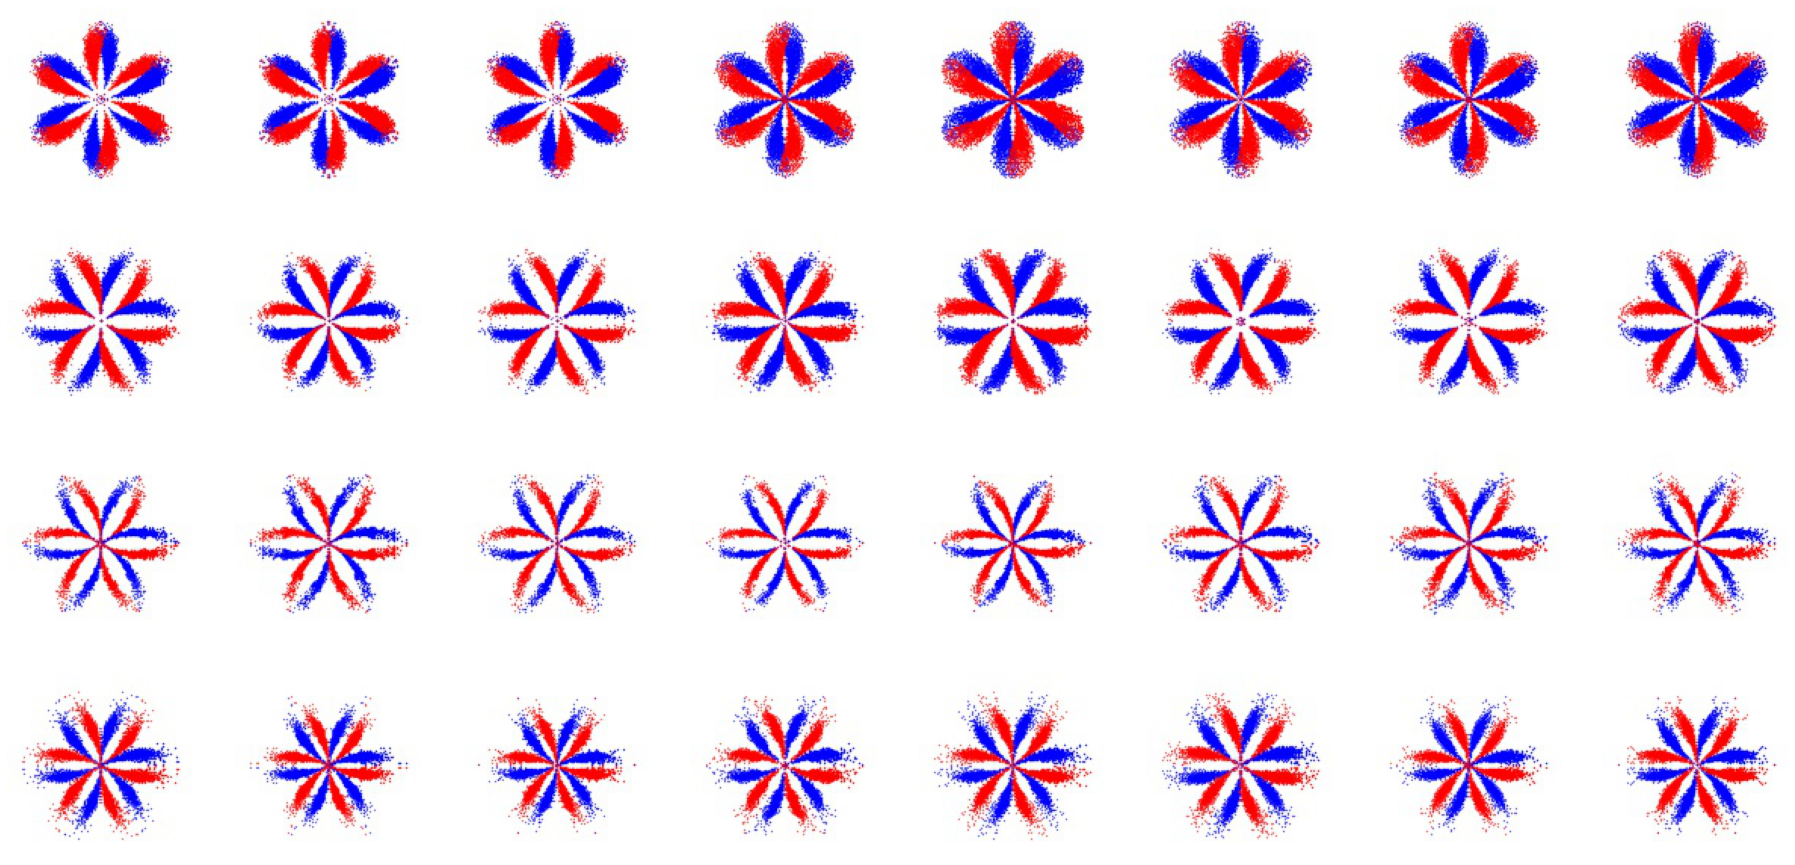

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 8
ncols = 8

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_NF_pix = [os.path.join(train_dir+'/NF', fname) 
                for fname in train_NF_fnames[pic_index-8:pic_index]]
next_BF_pix = [os.path.join(train_dir+'/BF', fname) 
                for fname in train_BF_fnames[pic_index-8:pic_index]]
next_OF_pix = [os.path.join(train_dir+'/OF', fname) 
                for fname in train_OF_fnames[pic_index-8:pic_index]]
next_IF_pix = [os.path.join(train_dir+'/IF', fname) 
                for fname in train_IF_fnames[pic_index-8:pic_index]]                


for i, img_path in enumerate(next_NF_pix+next_BF_pix+next_OF_pix+next_IF_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  

plt.show()

# Flow from Directory 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size=(123,123)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
       
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    vertical_flip=False)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 1747 images belonging to 4 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 216 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255 )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 222 images belonging to 4 classes.


# LENET



In [ ]:
num_classes = 4
input_shape = (123,123,3)
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from keras import models
from sklearn.model_selection import train_test_split
import keras

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VAL  =val_generator.n//val_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size
num_epochs = 1000

## Demo model 97 test *acc*

In [ ]:
demo_model = Sequential([
    layers.Conv2D(64,9,use_bias = True ,activation= 'relu', input_shape = (123,123,3)),
    layers.AveragePooling2D(2),
    layers.Conv2D(32,5,use_bias = True,activation = 'relu'),
    layers.AveragePooling2D(2),
    layers.Conv2D(32,3,use_bias = True,activation = 'relu'),
    layers.AveragePooling2D(2),
    # layers.Conv2D(16,1,use_bias = True,activation = 'relu'),
    # layers.AveragePooling2D(2)
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])
model = demo_model

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), metrics = ["accuracy"])
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10)
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, epochs=num_epochs,callbacks = [es])

Epoch 1/1000
54/54 [==============================] - 6s 104ms/step - loss: 1.5326 - accuracy: 0.3012 - val_loss: 1.3795 - val_accuracy: 0.3229
Epoch 2/1000
54/54 [==============================] - 6s 102ms/step - loss: 1.3777 - accuracy: 0.3964 - val_loss: 1.0743 - val_accuracy: 0.4375
Epoch 3/1000
54/54 [==============================] - 6s 102ms/step - loss: 1.0589 - accuracy: 0.4950 - val_loss: 0.9050 - val_accuracy: 0.5000
Epoch 4/1000
54/54 [==============================] - 5s 100ms/step - loss: 0.9173 - accuracy: 0.4180 - val_loss: 0.8280 - val_accuracy: 0.5625
Epoch 5/1000
54/54 [==============================] - 5s 99ms/step - loss: 0.8621 - accuracy: 0.5616 - val_loss: 0.8419 - val_accuracy: 0.5000
Epoch 6/1000
54/54 [==============================] - 6s 101ms/step - loss: 0.8557 - accuracy: 0.5540 - val_loss: 0.7559 - val_accuracy: 0.5677
Epoch 7/1000
54/54 [==============================] - 6s 105ms/step - loss: 0.8129 - accuracy: 0.5213 - val_loss: 0.7179 - val_accuracy: 

## Filters decreasing size increasing 99 test acc
Trained on 1hp 
0 (0.89), 2 (0.82) , 3(0.78)

In [ ]:
demo_model2 = Sequential([
    layers.Conv2D(64,3,use_bias = True ,activation= 'relu', input_shape = (123,123,3)),
    layers.AveragePooling2D(2),
    layers.Conv2D(32,5,use_bias = True,activation = 'relu'),
    layers.AveragePooling2D(2),
    layers.Conv2D(16,7,use_bias = True,activation = 'relu'),
    layers.AveragePooling2D(2),
    # layers.Conv2D(16,1,use_bias = True,activation = 'relu'),
    # layers.AveragePooling2D(2)
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])
model=demo_model2 
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), metrics = ["accuracy"])
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10,restore_best_weights=True)
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, epochs=num_epochs,callbacks = [es])

## Filters increasing , size increasing 
Trained on 0  
0(0.97), 1(0.95),2(0.85),3(0.85)

In [ ]:
demo_model2 = Sequential([
    layers.Conv2D(16,3,use_bias = True ,activation= 'relu', input_shape = (123,123,3)),
    layers.AveragePooling2D(2),
    layers.Conv2D(32,5,use_bias = True,activation = 'relu'),
    layers.AveragePooling2D(2),
    layers.Conv2D(64,7,use_bias = True,activation = 'relu'),
    layers.AveragePooling2D(2),
    # layers.Conv2D(16,1,use_bias = True,activation = 'relu'),
    # layers.AveragePooling2D(2)
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])
model=demo_model2 
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), metrics = ["accuracy"])
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights=True)
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, epochs=num_epochs,callbacks = [es])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 121, 121, 16)      448       
                                                                 
 average_pooling2d_3 (Averag  (None, 60, 60, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 32)        12832     
                                                                 
 average_pooling2d_4 (Averag  (None, 28, 28, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        100416    
                                                                 
 average_pooling2d_5 (Averag  (None, 11, 11, 64)      

In [ ]:
!pip install keras-tuner
import kerastuner

## KERAS TUNER 

In [ ]:
from kerastuner.applications import HyperResNet
from kerastuner.tuners import Hyperband

from kerastuner import HyperParameters
hp = HyperParameters()
hp.Choice('learning_rate', values=[1e-3, 1e-4])
hp.Fixed('optimizer', value='adam')
hypermodel = HyperResNet(input_shape=(123, 123, 3), classes=4)

tuner = Hyperband(
    hypermodel,
    hyperparameters=hp,
    tune_new_entries=False,
    objective='val_accuracy',
    max_epochs=20,
    directory='ResNet',
    project_name='Hp0')
es = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
tuner.search(train_generator, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, epochs=num_epochs,callbacks = [es])



Trial 30 Complete [00h 09m 50s]
val_accuracy: 0.8854166865348816

Best val_accuracy So Far: 0.9270833134651184
Total elapsed time: 02h 37m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'conv3_depth': 8,
 'conv4_depth': 36,
 'learning_rate': 0.01,
 'optimizer': 'sgd',
 'pooling': 'avg',
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'version': 'next'}

In [ ]:
resnetmodel = tuner.get_best_models(num_models=1)[0]


In [ ]:
resnetmodel.build(input_shape)

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 123, 123, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 129, 129, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 62, 62, 64)   9408        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 62, 62, 64)   256         ['conv1_conv[0][0]']        

# History Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


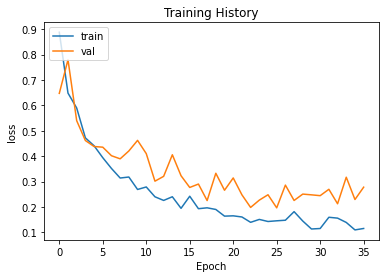

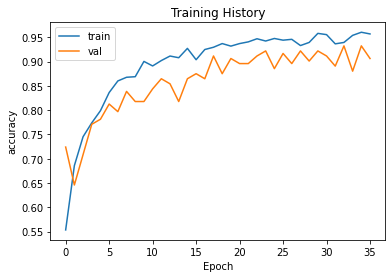

In [ ]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,val): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[val])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

# Model Evaluation

Text(69.0, 0.5, 'Actual')

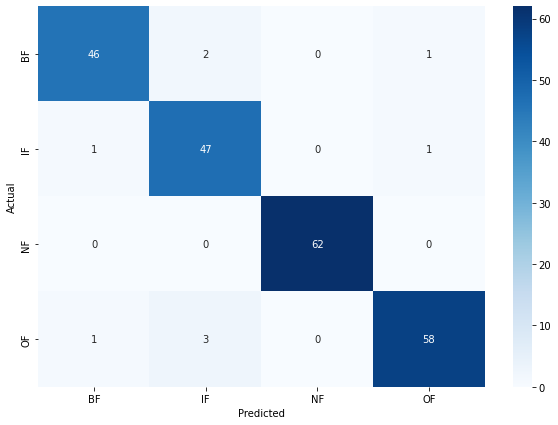

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = test_generator.class_indices
predY=model.predict(test_generator) 
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, labels,labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues,fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

# plt.show()
# print(cm)

In [ ]:

print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

          BF       0.96      0.94      0.95        49
          IF       0.90      0.96      0.93        49
          NF       1.00      1.00      1.00        62
          OF       0.97      0.94      0.95        62

    accuracy                           0.96       222
   macro avg       0.96      0.96      0.96       222
weighted avg       0.96      0.96      0.96       222



After much hardwork  :
# Extracting misclassified images

{0: 'BF', 1: 'IF', 2: 'NF', 3: 'OF'}


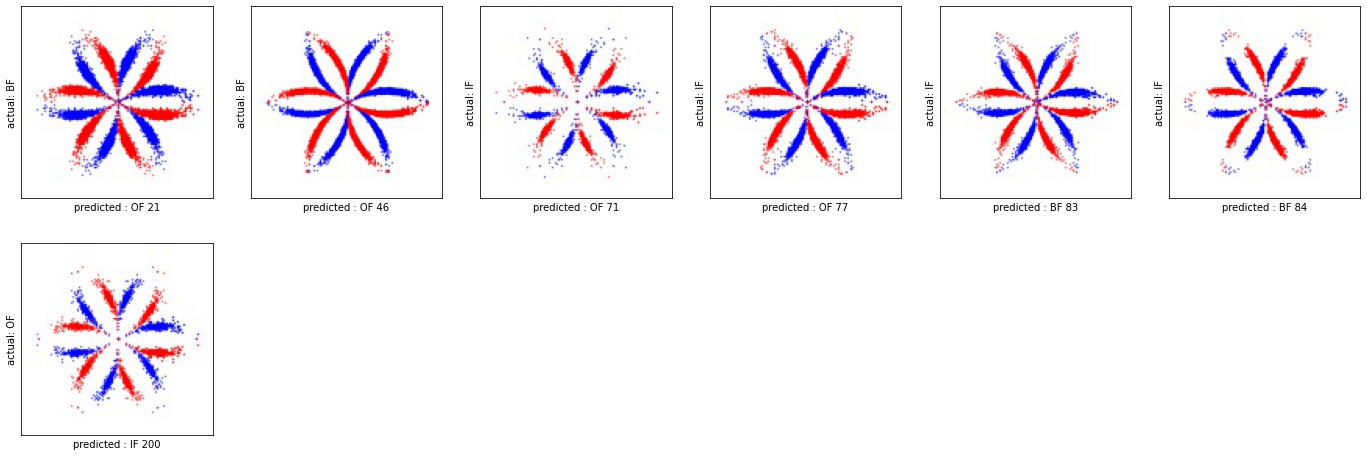

In [ ]:
# for batch in test_generator:
#   images = batch[0]
#   labels = batch[1]
#   for i in range(len(labels)):
#     plt.imshow(images[i])
#     print(labels[i])
labeldic = {}
for key,value in  test_generator.class_indices.items():
    labeldic[value] = key
print(labeldic)
#Boolean of misclassified , True = misclassified
A=(y_pred!=y_actual)
# print(A)
miscl= np.where(A)
miscl = miscl[0]
 
#Getting Batch id and Imno in Batch
batchid = []
# print(miscl[3])
for x in miscl : 
  i = int(x/batch_size)
  n = x%batch_size
  batchid.append((i,n,x)) 
# print(batchid)

def plotmis(image,acl,prl,idx):
  plt.imshow(image)
  plt.gca().set_xticks([])
  plt.gca().set_yticks([])
  plt.xlabel('predicted : ' + prl + " " + str(idx))
  plt.ylabel('actual: ' + acl )
fig = plt.gcf()
fig.set_size_inches(6 * 4, 2 * 4)
for i,mis in enumerate(batchid) :
    batch = mis[0]
    imno = mis[1]
    idx = mis[2]
    image = test_generator[batch][0][imno]
    aclabel = labeldic[y_actual[idx]]
    prelabel = labeldic[y_pred[idx]]
    ax = plt.subplot(2,6,i+1)
    plotmis(image,aclabel,prelabel,idx)
# for batch in test_generator:


# Evaluating on different Hps

## Testing on **1hp** 89%

In [ ]:
train_dir1 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/1 hp_352/train'
val_dir1   = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/1 hp_352/val'
test_dir1  = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/1 hp_352/test'


In [ ]:
test_datagen1 = ImageDataGenerator(rescale=1./255 )

test_generator1 = test_datagen.flow_from_directory(
    test_dir1,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 221 images belonging to 4 classes.


### Model Evaluation

Text(69.0, 0.5, 'Actual')

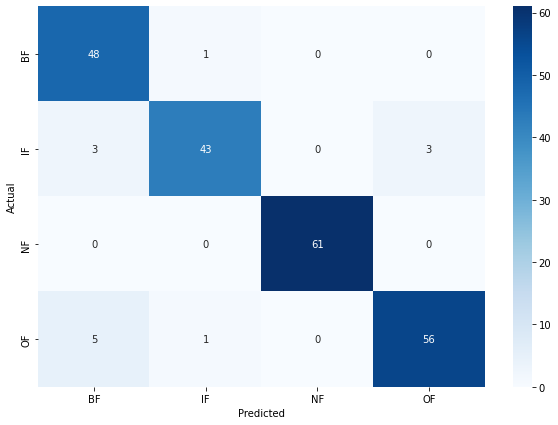

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = test_generator.class_indices
predY=model.predict(test_generator1) 
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, labels,labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues,fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

# plt.show()
# print(cm)

In [ ]:
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

          BF       0.86      0.98      0.91        49
          IF       0.96      0.88      0.91        49
          NF       1.00      1.00      1.00        61
          OF       0.95      0.90      0.93        62

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221



## Testing on **2hp** 82%

In [ ]:
train_dir2 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/2 hp_352/train'
val_dir2   = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/2 hp_352/val'
test_dir2  = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/2 hp_352/test'


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255 )

test_generator2 = test_datagen.flow_from_directory(
    test_dir2,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 222 images belonging to 4 classes.


Model Evaluation

Text(69.0, 0.5, 'Actual')

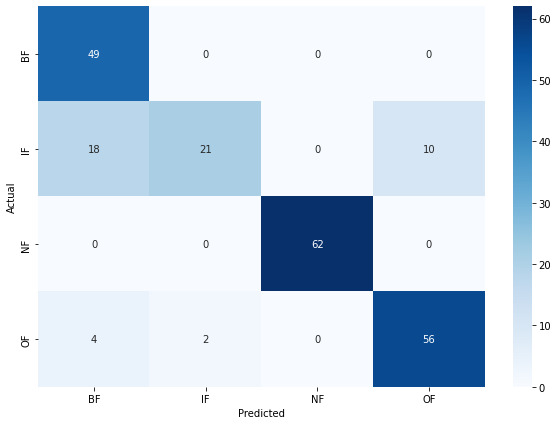

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = test_generator2.class_indices
predY= model.predict(test_generator2) 
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator2.classes
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, labels,labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues,fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

# plt.show()
# print(cm)

In [ ]:
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

          BF       0.69      1.00      0.82        49
          IF       0.91      0.43      0.58        49
          NF       1.00      1.00      1.00        62
          OF       0.85      0.90      0.88        62

    accuracy                           0.85       222
   macro avg       0.86      0.83      0.82       222
weighted avg       0.87      0.85      0.83       222



## Testing on **3hp** 78%

In [ ]:
train_dir3= '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/3 hp_352/train'
val_dir3  = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/3 hp_352/val'
test_dir3 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/3 hp_352/test'


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255 )

test_generator3= test_datagen.flow_from_directory(
    test_dir3,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 222 images belonging to 4 classes.


Model Evaluation

Text(69.0, 0.5, 'Actual')

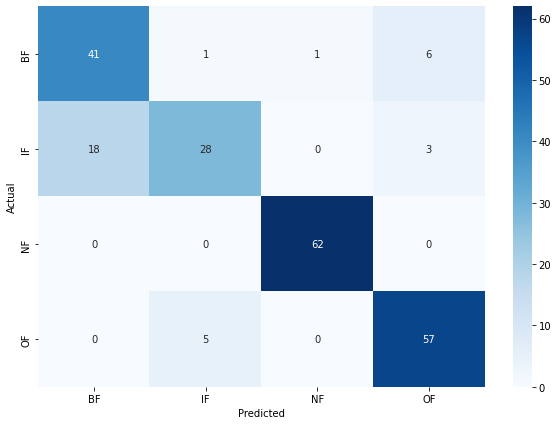

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = test_generator3.class_indices
predY= model.predict(test_generator3) 
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator3.classes
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, labels,labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues,fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

# plt.show()
# print(cm)

In [ ]:
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

          BF       0.69      0.84      0.76        49
          IF       0.82      0.57      0.67        49
          NF       0.98      1.00      0.99        62
          OF       0.86      0.92      0.89        62

    accuracy                           0.85       222
   macro avg       0.84      0.83      0.83       222
weighted avg       0.85      0.85      0.84       222



In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1600, 1)]         0         
                                                                 
 conv1d_4 (Conv1D)           (None, 800, 64)           512       
                                                                 
 conv1d_5 (Conv1D)           (None, 400, 32)           6176      
                                                                 
 dense_2 (Dense)             (None, 400, 280)          9240      
                                                                 
 conv1d_transpose_9 (Conv1DT  (None, 800, 32)          26912     
 ranspose)                                                       
                                                                 
 conv1d_transpose_10 (Conv1D  (None, 1600, 64)         14400     
 Transpose)                                                